In [1]:
%matplotlib inline
import gym
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\titanic')

declare the constants using the tf.constant()

In [46]:
train=pd.read_csv('train1.csv')

In [47]:
train['Embarked'].unique()

array([1, 2, 3], dtype=int64)

In [48]:
##549 not survived and 342 survived.
#train['Survived'].value_counts()
train[0:5]
len(train)

891

In [49]:
train.columns
sur=train['Survived']
train=train.drop(['Survived'],axis=1)
train=train.drop(['Embarked'],axis=1)

In [50]:
test=train[600:891]
train=train[0:600]

In [51]:
ls=[]
for i in sur:
    if i==0:
        ls.append([1,0])
    else:
        ls.append([0,1])
print(ls[0:5])

[[1, 0], [0, 1], [0, 1], [0, 1], [1, 0]]


In [52]:
train_ls=ls[0:600]
teest_ls=ls[600:891]

In [53]:

print(train[0:1].values)
print(sur[0:1].values.reshape(1,1))

print(sur[0:1])

[[  3.     1.    22.     1.     0.     7.25   2.     0.  ]]
[[0]]
0    0
Name: Survived, dtype: int64


epochs = feed forward + backpropagation

batch_size= images load from total set in batch of 100.

In [67]:
nodes_hl1=10
nodes_hl2=10
nodes_hl3=10
n_classes=2

In [68]:
x=tf.placeholder('float',[None,8])
y=tf.placeholder('float')


In [69]:
def neural_network_model(data):
    hidden_1_layer={'weights':tf.Variable(tf.random_normal([8,nodes_hl1])),
                   'biases':tf.Variable(tf.random_normal([nodes_hl1]))}
    
    hidden_2_layer={'weights':tf.Variable(tf.random_normal([nodes_hl1,nodes_hl2])),
                   'biases':tf.Variable(tf.random_normal([nodes_hl2]))}
    
    hidden_3_layer={'weights':tf.Variable(tf.random_normal([nodes_hl2,nodes_hl3])),
                   'biases':tf.Variable(tf.random_normal([nodes_hl3]))}
    
    final_layer={'weights':tf.Variable(tf.random_normal([nodes_hl3,n_classes])),
                'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    layer1 = tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
    layer1 = tf.nn.relu(layer1)
    
    layer2 = tf.add(tf.matmul(layer1,hidden_2_layer['weights']),hidden_2_layer['biases'])
    layer2 = tf.nn.relu(layer2)
    
    layer3 = tf.add(tf.matmul(layer2,hidden_3_layer['weights']),hidden_3_layer['biases'])
    layer3 = tf.nn.relu(layer3)
    
    output=tf.matmul(layer3,final_layer['weights']) + final_layer['biases']
    
    return output

In [70]:
epoch_loss1=[]
def train_neural_network(x):
    ##this prediction is the output from our neural network
    prediction = neural_network_model(x)
    
    cost =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y))
    
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    
    hm_epochs=20
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss=0
            for i in range(1,len(train)):
                epoch_x = train[i-1:i].values
                epoch_y = train_ls[i]
                #print(epoch_x)
                #print(epoch_y)
                i,c=sess.run([optimizer,cost],feed_dict={x:epoch_x,y:epoch_y})
                epoch_loss+=c
            print('epoch is %s completed  out of %s loss %s' % (epoch,hm_epochs,epoch_loss ))
            epoch_loss1.append(epoch_loss)
        
        correct=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
        
        accuracy=tf.reduce_mean(tf.cast(correct,'float'))
        
        print('accuracy is %s' % (accuracy.eval({x:test,y:teest_ls})))

In [71]:
train_neural_network(x)

epoch is 0 completed  out of 20 loss 30233.7386643
epoch is 1 completed  out of 20 loss 5303.6912218
epoch is 2 completed  out of 20 loss 2441.9417253
epoch is 3 completed  out of 20 loss 1494.67704554
epoch is 4 completed  out of 20 loss 1177.4188573
epoch is 5 completed  out of 20 loss 1112.48362385
epoch is 6 completed  out of 20 loss 944.762983632
epoch is 7 completed  out of 20 loss 980.823152203
epoch is 8 completed  out of 20 loss 806.684186455
epoch is 9 completed  out of 20 loss 990.102823753
epoch is 10 completed  out of 20 loss 905.910661086
epoch is 11 completed  out of 20 loss 731.314659297
epoch is 12 completed  out of 20 loss 892.706777728
epoch is 13 completed  out of 20 loss 677.864974133
epoch is 14 completed  out of 20 loss 693.991009957
epoch is 15 completed  out of 20 loss 654.618118455
epoch is 16 completed  out of 20 loss 665.379615282
epoch is 17 completed  out of 20 loss 631.429624861
epoch is 18 completed  out of 20 loss 624.977210463
epoch is 19 completed  ou

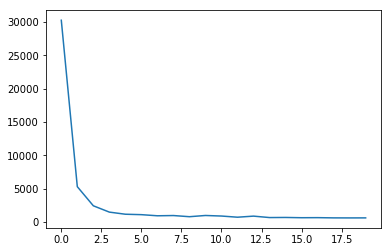

In [72]:
plt.plot(epoch_loss1)
plt.show()